<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/Gold_AskingPricePrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

exploring the dataset

In [2]:
data = pd.read_csv('Gold Futures Historical Data.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2025/02/17,"2,911.20","2,892.69","2,917.30","2,892.44",80.29K,0.65%
1,2025/02/16,"2,892.37","2,896.10","2,903.72","2,887.97",NaN,-0.29%
2,2025/02/14,"2,900.70","2,957.30","2,964.10","2,889.90",228.08K,-1.52%
3,2025/02/13,"2,945.40","2,928.80","2,958.80","2,925.80",169.50K,0.57%
4,2025/02/12,"2,928.70","2,927.00","2,936.50","2,886.50",204.63K,-0.13%
...,...,...,...,...,...,...,...
1123,2020/10/07,"1,886.80","1,879.90","1,897.40","1,873.20",0.44K,-0.94%
1124,2020/10/06,"1,904.80","1,913.70","1,922.00","1,875.10",1.05K,-0.59%
1125,2020/10/05,"1,916.10","1,906.70","1,920.00","1,887.70",0.66K,0.65%
1126,2020/10/02,"1,903.80","1,907.00","1,919.00","1,893.00",0.81K,-0.44%


In [3]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1128,1128,1128,1128,1128,1125,1128
unique,1128,1031,1012,1008,1010,745,378
top,2025/02/17,"1,763.90","1,818.00","1,875.00","1,763.00",0.62K,0.00%
freq,1,3,4,3,4,11,17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1128 non-null   object
 1   Price     1128 non-null   object
 2   Open      1128 non-null   object
 3   High      1128 non-null   object
 4   Low       1128 non-null   object
 5   Vol.      1125 non-null   object
 6   Change %  1128 non-null   object
dtypes: object(7)
memory usage: 61.8+ KB


copying the data to clean it

In [5]:
copied_data = data.copy()

In [6]:
copied_data['Date'] = pd.to_datetime(copied_data['Date'])

In [7]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1128 non-null   datetime64[ns]
 1   Price     1128 non-null   object        
 2   Open      1128 non-null   object        
 3   High      1128 non-null   object        
 4   Low       1128 non-null   object        
 5   Vol.      1125 non-null   object        
 6   Change %  1128 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 61.8+ KB


cleaning the data

In [8]:
copied_data['Price'] = copied_data['Price'].str.replace(',', '').astype(float)

In [9]:
copied_data['Open'] = copied_data['Open'].str.replace(',', '').astype(float)

In [10]:
copied_data['High'] = copied_data['High'].str.replace(',', '').astype(float)

In [11]:
copied_data['Low'] = copied_data['Low'].str.replace(',', '').astype(float)

Convert 'Vol.' to numeric, handling the 'K' notation for thousands

In [12]:
copied_data['Vol.'] = copied_data['Vol.'].str.replace('K', '').astype(float) * 1000

Remove the '%' sign and convert 'Change %' to a float


In [13]:
copied_data['Change %'] = copied_data['Change %'].str.replace('%', '').astype(float)

checking for missing values

In [14]:
missing_values = copied_data.isnull().sum()
missingvalues_percentage = (missing_values / len(copied_data)) * 100
print(missing_values)
print(missingvalues_percentage)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        3
Change %    0
dtype: int64
Date        0.000000
Price       0.000000
Open        0.000000
High        0.000000
Low         0.000000
Vol.        0.265957
Change %    0.000000
dtype: float64


filling in the missing data

In [15]:
copied_data.fillna(method='ffill' , inplace=True)

<ipython-input-15-8c559f3bc2c8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copied_data.fillna(method='ffill' , inplace=True)


In [16]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-17,2911.20,2892.69,2917.30,2892.44,80290.0,0.65
1,2025-02-16,2892.37,2896.10,2903.72,2887.97,80290.0,-0.29
2,2025-02-14,2900.70,2957.30,2964.10,2889.90,228080.0,-1.52
3,2025-02-13,2945.40,2928.80,2958.80,2925.80,169500.0,0.57
4,2025-02-12,2928.70,2927.00,2936.50,2886.50,204630.0,-0.13
...,...,...,...,...,...,...,...
1123,2020-10-07,1886.80,1879.90,1897.40,1873.20,440.0,-0.94
1124,2020-10-06,1904.80,1913.70,1922.00,1875.10,1050.0,-0.59
1125,2020-10-05,1916.10,1906.70,1920.00,1887.70,660.0,0.65
1126,2020-10-02,1903.80,1907.00,1919.00,1893.00,810.0,-0.44


In [17]:
# Apply forward fill to fill missing values in 'Vol.'
copied_data['Vol.'] = copied_data['Vol.'].ffill()

# Check if the NaN values are filled
print(copied_data.tail())

           Date   Price    Open    High     Low    Vol.  Change %
1123 2020-10-07  1886.8  1879.9  1897.4  1873.2   440.0     -0.94
1124 2020-10-06  1904.8  1913.7  1922.0  1875.1  1050.0     -0.59
1125 2020-10-05  1916.1  1906.7  1920.0  1887.7   660.0      0.65
1126 2020-10-02  1903.8  1907.0  1919.0  1893.0   810.0     -0.44
1127 2020-10-01  1912.3  1888.0  1913.9  1886.0   750.0      1.11


visualization of the dataset

<Axes: xlabel='Date', ylabel='Price'>

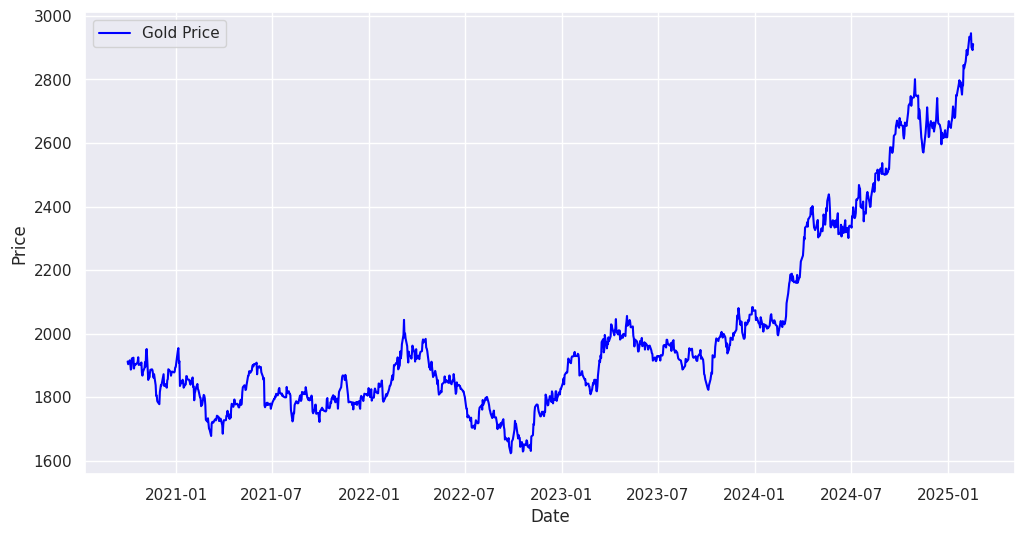

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=copied_data, label='Gold Price', color='blue')

In [19]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [20]:
import mplfinance as mpf

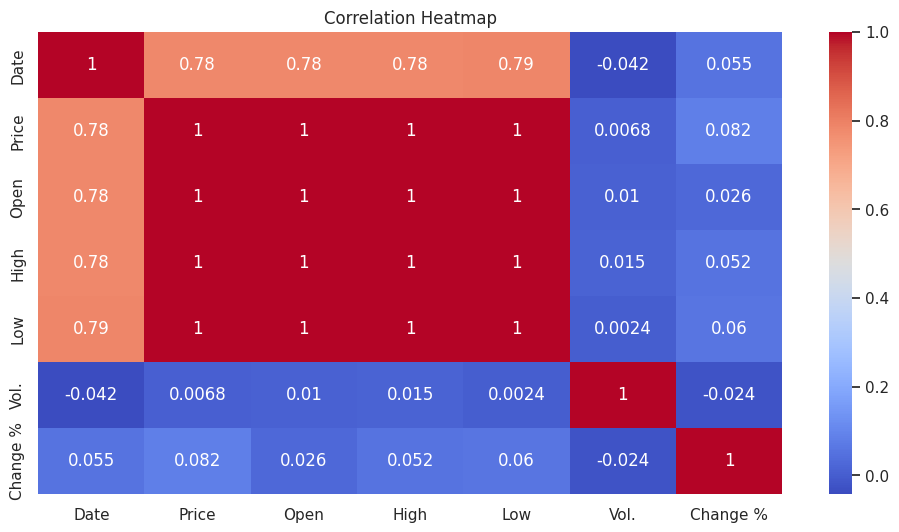

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(copied_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Open', ylabel='Price'>

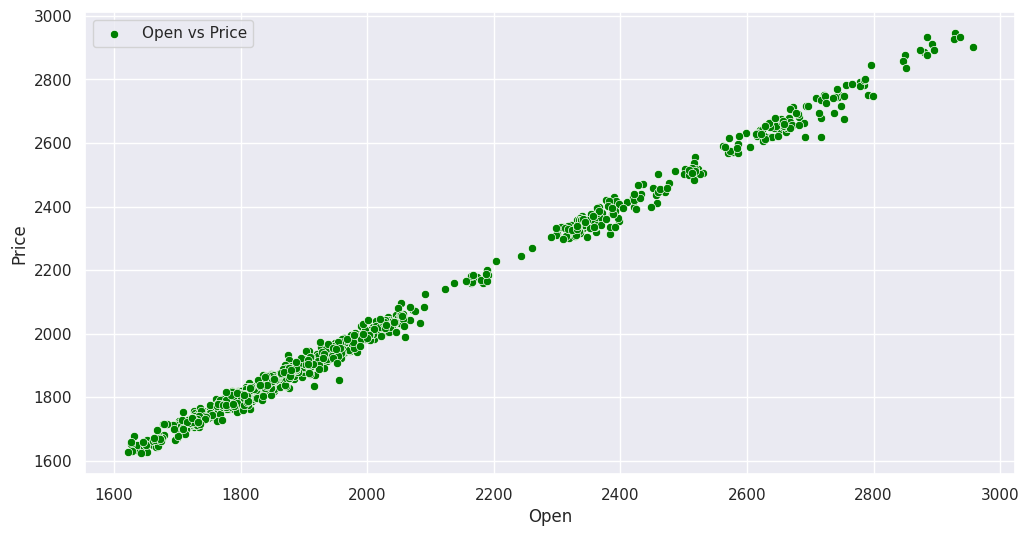

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Price', data=copied_data, label='Open vs Price', color='green')

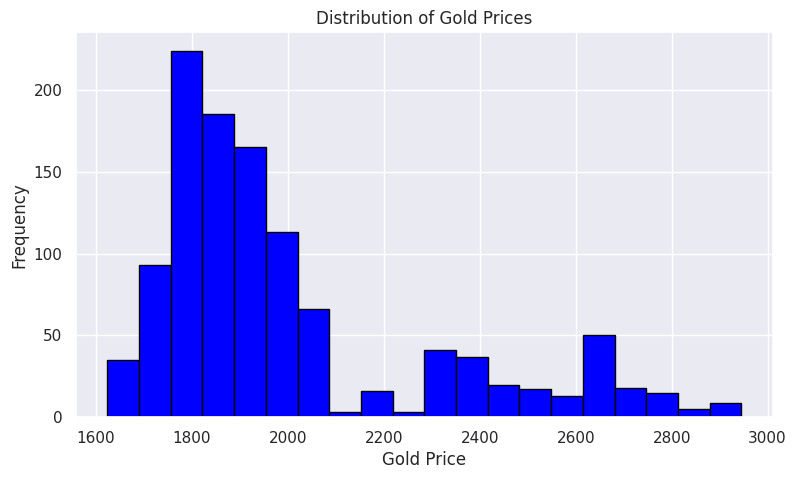

In [23]:
plt.figure(figsize=(9, 5))
plt.hist(copied_data['Price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.title('Distribution of Gold Prices')
plt.show()

In [24]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-17,2911.20,2892.69,2917.30,2892.44,80290.0,0.65
1,2025-02-16,2892.37,2896.10,2903.72,2887.97,80290.0,-0.29
2,2025-02-14,2900.70,2957.30,2964.10,2889.90,228080.0,-1.52
3,2025-02-13,2945.40,2928.80,2958.80,2925.80,169500.0,0.57
4,2025-02-12,2928.70,2927.00,2936.50,2886.50,204630.0,-0.13
...,...,...,...,...,...,...,...
1123,2020-10-07,1886.80,1879.90,1897.40,1873.20,440.0,-0.94
1124,2020-10-06,1904.80,1913.70,1922.00,1875.10,1050.0,-0.59
1125,2020-10-05,1916.10,1906.70,1920.00,1887.70,660.0,0.65
1126,2020-10-02,1903.80,1907.00,1919.00,1893.00,810.0,-0.44


cleaning and gathering data information

In [25]:
# Convert columns to numeric types
copied_data['Open'] = pd.to_numeric(copied_data['Open'], errors='coerce')
copied_data['High'] = pd.to_numeric(copied_data['High'], errors='coerce')
copied_data['Low'] = pd.to_numeric(copied_data['Low'], errors='coerce')
copied_data['Price'] = pd.to_numeric(copied_data['Price'], errors='coerce')  # Assuming 'Price' is equivalent to 'Close'
copied_data['Vol.'] = pd.to_numeric(copied_data['Vol.'], errors='coerce')
copied_data['Change %'] = pd.to_numeric(copied_data['Change %'], errors='coerce')

# Extract features from the 'Date' column
copied_data['Year'] = copied_data['Date'].dt.year
copied_data['Month'] = copied_data['Date'].dt.month
copied_data['Day'] = copied_data['Date'].dt.day
copied_data['DayOfWeek'] = copied_data['Date'].dt.dayofweek

# Handle missing values by forward-filling
copied_data.fillna(method='ffill', inplace=True)

<ipython-input-25-b16f9237d437>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copied_data.fillna(method='ffill', inplace=True)


In [26]:
copied_data.fillna(0, inplace=True)

feature scaling

In [27]:
x = copied_data[['Open', 'High', 'Low', 'Vol.', 'Change %', 'Year', 'Month', 'Day', 'DayOfWeek']]
y = copied_data['Price']

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [29]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
f_values, p_values = f_regression(x_scaled, y)
print('P-values: ', p_values)
print('F-values: ', f_values)

P-values:  [0.00000000e+000 0.00000000e+000 0.00000000e+000 8.18929507e-001
 5.92458670e-003 1.43268820e-220 4.65746312e-001 9.10449701e-001
 6.16738692e-001]
F-values:  [3.06595796e+05 6.37790073e+05 9.48353889e+05 5.24297983e-02
 7.60200655e+00 1.62406561e+03 5.32412030e-01 1.26554896e-02
 2.50617150e-01]


training and testing the data to perform predictions

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

performing predictions of the past 210 samples from the dataset

In [35]:
y_pred = regressor.predict(x_test)
print("Shape of X_test:", x_test.shape)
print("Shape of y_pred:", y_pred.shape)
print("Predictions: ", y_pred)

Shape of X_test: (226, 9)
Shape of y_pred: (226,)
Predictions:  [1874.8880941  1800.51443566 1932.77745543 2418.81484439 1695.78366709
 1935.26135718 1789.09577463 2023.64578323 1930.56167227 1782.38868749
 1913.68236116 2043.83532664 1870.40203858 1870.72870734 2686.83344442
 1932.98242179 2409.58230602 2029.96285963 1763.62829865 2016.98013113
 1918.78536232 1902.02154014 1824.44597773 1841.03612505 1925.72465851
 1986.2509611  1995.80674607 2665.92572345 2549.14648261 1828.78176948
 1951.67134621 1759.86021371 1989.11392365 1639.27784312 1840.00227525
 2378.23071181 1942.02709655 2507.41448725 1927.21411345 2662.90735021
 1856.581827   2032.84252449 1764.92114056 1779.872323   1727.76339606
 1748.23691251 1756.97423284 2086.21133605 2624.65696742 1984.43089676
 1895.95373075 1791.39970631 1814.69032457 2366.65740497 1883.58138093
 2019.52028866 1940.82666208 1919.17604556 1928.87679443 1646.89710548
 2659.59113017 2002.99459469 2315.13058043 2362.39789365 1896.1441413
 2340.39016934

In [36]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

Length of y_test: 226
Length of y_pred: 226


In [37]:
if len(y_test) == len(y_pred):
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results.head())
else:
    print("Lengths of y_test and y_pred do not match!")


      Actual    Predicted
1091  1872.4  1874.888094
898   1803.6  1800.514436
739   1930.6  1932.777455
140   2417.6  2418.814844
1019  1700.7  1695.783667


checking the quality of the model

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

r2_percentage = r2 * 100
print("R-squared Percentage: ", r2_percentage)

Mean Squared Error:  23.328547279316073
R-squared:  0.9997497836364168
R-squared Percentage:  99.97497836364168


In [39]:
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared: ", adjusted_r2)

Adjusted R-squared:  0.9997393579546008


In [40]:
x_train_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.109e+05
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:25:09   Log-Likelihood:                -2779.5
No. Observations:                 902   AIC:                             5579.
Df Residuals:                     892   BIC:                             5627.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2002.1762      0.177   1.13e+04      0.0

In [41]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,DayOfWeek
0,2025-02-17,2911.20,2892.69,2917.30,2892.44,80290.0,0.65,2025,2,17,0
1,2025-02-16,2892.37,2896.10,2903.72,2887.97,80290.0,-0.29,2025,2,16,6
2,2025-02-14,2900.70,2957.30,2964.10,2889.90,228080.0,-1.52,2025,2,14,4
3,2025-02-13,2945.40,2928.80,2958.80,2925.80,169500.0,0.57,2025,2,13,3
4,2025-02-12,2928.70,2927.00,2936.50,2886.50,204630.0,-0.13,2025,2,12,2
...,...,...,...,...,...,...,...,...,...,...,...
1123,2020-10-07,1886.80,1879.90,1897.40,1873.20,440.0,-0.94,2020,10,7,2
1124,2020-10-06,1904.80,1913.70,1922.00,1875.10,1050.0,-0.59,2020,10,6,1
1125,2020-10-05,1916.10,1906.70,1920.00,1887.70,660.0,0.65,2020,10,5,0
1126,2020-10-02,1903.80,1907.00,1919.00,1893.00,810.0,-0.44,2020,10,2,4


predicting future values.
we are going to be creating a recurrent neural network for forecasting analysis to predict future prices using tensorflow/keras.

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [43]:
# Select features (excluding target 'Price')
features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Year', 'Month', 'Day', 'DayOfWeek']
target = 'Price'


# Initialize scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
# Scale features
copied_data[features] = feature_scaler.fit_transform(copied_data[features])
# Scale target separately (must reshape to avoid errors)
copied_data[target] = target_scaler.fit_transform(copied_data[[target]])  # Double brackets to keep it 2D

# Set sequence length (how many past days used for prediction)
sequence_length = 1120

# Create sequences for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target])
    return np.array(X), np.array(y)
# Check the number of sequences that can be created
sequence_length = len(copied_data) - sequence_length
print(f"Number of sequences that can be created: {sequence_length}")


# Prepare sequences
x, y = create_sequences(copied_data, target, sequence_length)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

# Reshape for LSTM (samples, time steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], len(features))
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], len(features))


Number of sequences that can be created: 8


In [44]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for price prediction
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test))


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.0311 - mae: 0.1174 - val_loss: 8.5427e-04 - val_mae: 0.0225
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0031 - mae: 0.0406 - val_loss: 9.5193e-04 - val_mae: 0.0234
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - mae: 0.0342 - val_loss: 6.9571e-04 - val_mae: 0.0196
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0020 - mae: 0.0332 - val_loss: 6.5462e-04 - val_mae: 0.0190
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0018 - mae: 0.0312 - val_loss: 0.0010 - val_mae: 0.0245
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - mae: 0.0309 - val_loss: 5.0095e-04 - val_mae: 0.0166
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - mae: 0.0257 - val_loss: 5.1226e-04 - val_mae: 0.0169
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - mae: 0.0278 - val_loss: 3.9454e-04 - val_mae: 0.0148
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━

In [46]:
# Predicting the next 30 days' prices
predicted_prices = []

# Get the last sequence from the copied_data
last_sequence = copied_data[features].iloc[-sequence_length:].values
last_sequence = feature_scaler.transform(last_sequence)  # Scale the last sequence
last_sequence = last_sequence.reshape((1, last_sequence.shape[0], len(features)))  # Reshape for LSTM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [47]:
# Predict the next 30 days
for _ in range(30):
    predicted_price = model.predict(last_sequence)
    predicted_prices.append(predicted_price[0][0])  # Store the predicted price

    # Prepare the next input sequence
    # Create a new data point for the predicted price
    new_data_point = np.zeros((1, len(features)))  # Create a new data point with zeros
    new_data_point[0, -1] = predicted_price[0][0]  # Set the last feature (Price) to the predicted price

    # Scale the new data point
    new_data_point = feature_scaler.transform(new_data_point)

    # Update the last sequence
    last_sequence = np.append(last_sequence[:, 1:, :], new_data_point.reshape(1, 1, len(features)), axis=1)
# Inverse transform the predicted prices
predicted_prices = target_scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [48]:
# Inverse transform the predicted prices
predicted_prices_original = target_scaler.inverse_transform(predicted_prices.reshape(-1, 1))

# Print the predicted prices for the next 30 days in original format
print("Predicted Prices for the next 30 days (original scale):")
for i in range(30):
    print(f"Day {i + 1}: {predicted_prices_original[i][0]}")

Predicted Prices for the next 30 days (original scale):
Day 1: 3532542.75
Day 2: 3532603.75
Day 3: 3532530.5
Day 4: 3532512.0
Day 5: 3532548.5
Day 6: 3532615.0
Day 7: 3532689.0
Day 8: 3532674.0
Day 9: 3532657.0
Day 10: 3532657.25
Day 11: 3532657.25
Day 12: 3532657.25
Day 13: 3532657.25
Day 14: 3532657.25
Day 15: 3532657.0
Day 16: 3532657.25
Day 17: 3532657.25
Day 18: 3532657.25
Day 19: 3532657.25
Day 20: 3532657.25
Day 21: 3532657.25
Day 22: 3532657.25
Day 23: 3532657.25
Day 24: 3532657.25
Day 25: 3532657.25
Day 26: 3532657.25
Day 27: 3532657.25
Day 28: 3532657.25
Day 29: 3532657.25
Day 30: 3532657.25


In [49]:
copied_data

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,DayOfWeek
0,2025-02-17,0.974126,0.951632,0.961454,0.974589,0.161643,0.693727,1.0,0.090909,0.533333,0.000000
1,2025-02-16,0.959880,0.954185,0.951231,0.971184,0.161643,0.578106,1.0,0.090909,0.500000,1.000000
2,2025-02-14,0.966182,1.000000,0.996687,0.972654,0.459625,0.426814,1.0,0.090909,0.433333,0.666667
3,2025-02-13,1.000000,0.978664,0.992697,1.000000,0.341513,0.683887,1.0,0.090909,0.400000,0.500000
4,2025-02-12,0.987366,0.977317,0.975909,0.970064,0.412343,0.597786,1.0,0.090909,0.366667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
1123,2020-10-07,0.199122,0.193442,0.193631,0.198202,0.000645,0.498155,0.0,0.818182,0.200000,0.333333
1124,2020-10-06,0.212740,0.218745,0.212151,0.199650,0.001875,0.541205,0.0,0.818182,0.166667,0.166667
1125,2020-10-05,0.221289,0.213505,0.210645,0.209247,0.001089,0.693727,0.0,0.818182,0.133333,0.000000
1126,2020-10-02,0.211984,0.213730,0.209892,0.213285,0.001391,0.559656,0.0,0.818182,0.033333,0.666667


In [ ]:
# Inverse transform the actual values as well
actual_values = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions alongside actual values
print("Predictions vs Actual Values:")
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i][0]}, Actual: {actual_values[i][0]}")

Predictions vs Actual Values:
Prediction: 0.1264415979385376, Actual: 0.1149190497806023
Prediction: 0.11266463994979858, Actual: 0.0950975941897414
Prediction: 0.10755795240402222, Actual: 0.09623241034952335
Prediction: 0.09591177105903625, Actual: 0.0797397488273568
Prediction: 0.0883990004658699, Actual: 0.07580571947344539
Prediction: 0.09844446182250977, Actual: 0.10341957936147672
Prediction: 0.12424218654632568, Actual: 0.13776668179754892
Prediction: 0.13661009073257446, Actual: 0.14192767438341658
Prediction: 0.13973692059516907, Actual: 0.141549402330156
Prediction: 0.14497524499893188, Actual: 0.1476017551823272
Prediction: 0.14431606233119965, Actual: 0.1436677258284158
Prediction: 0.15090419352054596, Actual: 0.15789075503101824
Prediction: 0.1409647911787033, Actual: 0.13322741715842046
Prediction: 0.13833202421665192, Actual: 0.1333030715690724
Prediction: 0.13861048221588135, Actual: 0.13284914510515966
Prediction: 0.14087480306625366, Actual: 0.13481615978211536
Predi

In [ ]:
errors = predictions - actual_values
absolute_errors = np.abs(errors)
percentage_errors = (absolute_errors / actual_values) * 100
print(f"Average Absolute Error: {np.mean(absolute_errors)}")
print(f"Average Percentage Error: {np.mean(percentage_errors)}%")

Average Absolute Error: 0.008375665949897259
Average Percentage Error: 7.573201767136589%
